In [1]:
from simphony.libraries.ideal import coupler, waveguide
from simphony.time_domain.ideal import TimeCoupler, TimeWaveguide,TimePhase_Modulator # import td.coupler and td.waveguide
from simphony.time_domain.time_circuit import TimeCircuit
import jax.numpy as jnp
from simphony.utils import dict_to_matrix
import matplotlib.pyplot as plt
from simphony.time_domain.utils import gaussian_pulse

In [4]:
# Use simulation.py to implement a ring resonator using only td.ideal components
ring_resonator_with_phase_modulator = TimeCircuit(
    netlist={
        "instances": {
            "coupler": "ideal_coupler",
            "ring": "ideal_waveguide",
            #"pmod": "ideal_modulator",
        },
        "connections": {
            "coupler,o3": "ring,o0",
            #"pmod,o1":"ring, o0",
            "ring,o1": "coupler,o2",
        },
        "ports": {
            "in": "coupler,o0",
            "out": "coupler,o1",
        },
    },
    models={
        "ideal_coupler": TimeCoupler,
        "ideal_waveguide": TimeWaveguide,
        #"ideal_modulator": TimePhase_Modulator,
        
    },
)

wl0 = 1.55
neff = 2.34
ng = 3.4
length = 100.0
loss = 100.0
T = 11e-12
N = 1000

t = jnp.linspace(0, T, N)
dt = t[1] - t[0]

t0 = T/2
std = 0.5e-12

f_mod = 0
coupling = 0.5
phi = jnp.pi/2

m = f_mod * t

waveguide_td = TimeWaveguide(dt, wl0=wl0, neff=neff, ng=ng, length=length, loss=loss)
coupler_td = TimeCoupler(coupling=coupling, loss=loss, phi=phi)

#phase_mod_td = TimePhase_Modulator(mod_signal = m, k_p = 1)

inputs = {
    'in': gaussian_pulse(t, t0 - 0.5*t0, std),
    'out': jnp.zeros_like(t),
}


ring_resonator_with_phase_modulator.instantiate(dt=1e-14, ideal_coupler=coupler_td, ideal_waveguide=waveguide_td)
outputs = ring_resonator_with_phase_modulator.run_sim(t, inputs)

KeyboardInterrupt: 

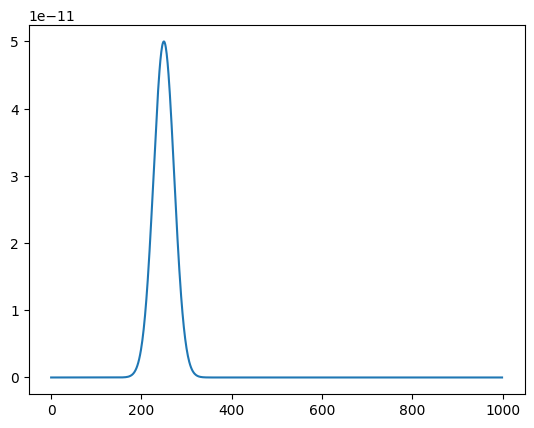

In [3]:
plt.plot(jnp.abs(outputs['out'])**2)

/tmp/ipykernel_60292/393463390.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


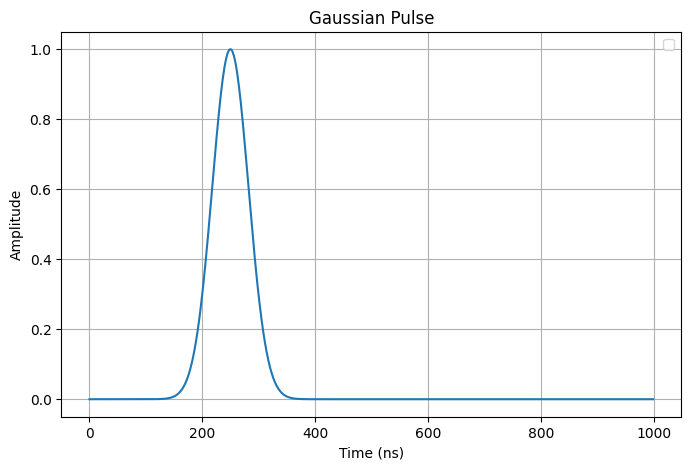

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(gaussian_pulse(t, t0 - 0.5*t0, std))
plt.title("Gaussian Pulse")
plt.xlabel("Time (ns)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Use simulation.py to implement a ring resonator using only td.ideal components
ring_resonator = TimeCircuit(
    netlist={
        "instances": {
            "coupler": "ideal_coupler",
            "ring": "ideal_waveguide",
        },
        "connections": {
            "coupler,o3": "ring,o0",
            "ring,o1": "coupler,o2",
        },
        "ports": {
            "in": "coupler,o0",
            "out": "coupler,o1",
        },
    },
    models={
        "ideal_coupler": TimeCoupler,
        "ideal_waveguide": TimeWaveguide
        #"mzi1": StateSpaceDiscrete,
        # "mzi2": StateSpaceContinuous
    },
)


In [4]:
x =  1 + 1j
x = jnp.abs(x)
print(x)

1.4142135623730951
